In [1]:
import flowermd
import hoomd
import gsd
import matplotlib.pyplot as plt
import numpy as np
import freud

/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/mdtraj/formats/__init__.py:13: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  from mdtraj.formats.trr import TRRTrajectoryFile


In [2]:
traj = gsd.hoomd.open('given-pps-cg.gsd')

In [3]:
def nop(frame):
    positions = frame.particles.position
    molecule_ids = frame.bonds.group
    temp = positions[0]
    vectors = []
    for i, pos in enumerate(positions):
            if i < len(molecule_ids):
                vectors.append(np.stack(pos) - np.stack(temp))
                temp = pos
    vectors = np.array(vectors[1:])
    return vectors

In [4]:
nematic = freud.order.Nematic()
import time
start = time.process_time()
orders = []
frames = []
count = 0
for frame in traj:
    count += 1
    frames.append(count)
    nematic.compute(nop(frame))
    orders.append(nematic.order)
    print("Nematic Order Parameter:", nematic.order)
print("Time taken:", time.process_time() - start, "s")

Nematic Order Parameter: 0.08366381376981735
Nematic Order Parameter: 0.08125422894954681
Nematic Order Parameter: 0.08344504237174988
Nematic Order Parameter: 0.07996778935194016
Nematic Order Parameter: 0.07861025631427765
Nematic Order Parameter: 0.07698450982570648
Nematic Order Parameter: 0.07232198864221573
Nematic Order Parameter: 0.07394228875637054
Nematic Order Parameter: 0.07208936661481857
Nematic Order Parameter: 0.06853335350751877
Nematic Order Parameter: 0.06938224285840988
Nematic Order Parameter: 0.06591777503490448
Nematic Order Parameter: 0.061639778316020966
Nematic Order Parameter: 0.06113795191049576
Nematic Order Parameter: 0.06189385801553726
Nematic Order Parameter: 0.05890277400612831
Nematic Order Parameter: 0.05628732591867447
Nematic Order Parameter: 0.05582907423377037
Nematic Order Parameter: 0.057618219405412674
Nematic Order Parameter: 0.05793359875679016
Nematic Order Parameter: 0.06021534278988838
Nematic Order Parameter: 0.05508735403418541
Nematic 

In [15]:
positions = traj[0].particles.position
molecule_ids = traj[0].bonds.group
print(len(molecule_ids))
print(len(positions))
temp = positions[0]
vectors = []
for i, pos in enumerate(positions):
        if i < len(molecule_ids):
            vectors.append(np.stack(pos) - np.stack(temp))
            temp = pos
vectors = np.array(vectors[1:])

9400
9800


/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jbieri/miniforge3/envs/flowerMD/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


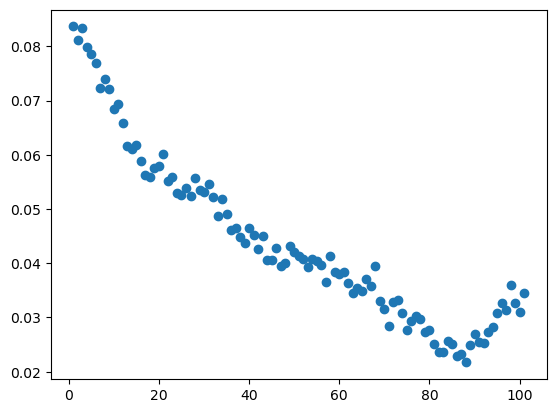

In [5]:
plt.scatter(frames, orders)

In [6]:
orders = []
frames = []
for frame in traj:
    count += 1
    frames.append(count)
    positions = frame.particles.position
    nematic.compute(positions)
    orders.append(nematic.order)
    

Text(0, 0.5, 'S2 parameter')

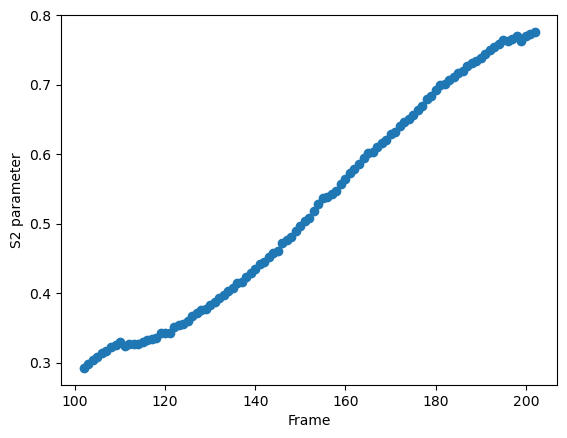

In [7]:
plt.scatter(frames, orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")